# MAT1856/APM466 Assignment 1

**Author:** Chenxi Liu, **Student #:** 1010615050


## Data Cleaning

In [1]:
import pandas as pd

# Specify file paths
file_path_info = "/Users/dawn/Desktop/uoft/sta1856/bond info.xlsx"
file_path_price = "/Users/dawn/Desktop/uoft/sta1856/bond price.xlsx"

# Read Excel files into dataframes
bond_info = pd.read_excel(file_path_info)
bond_price = pd.read_excel(file_path_price)

# Clean column names
bond_info.columns = bond_info.columns.str.lower().str.replace(" ", "_")
bond_price.columns = bond_price.columns.str.lower().str.replace(" ", "_")

# Convert YIELD column to numeric
bond_info['yield'] = pd.to_numeric(bond_info['yield'], errors='coerce')

# Convert date columns to datetime
bond_info['issue_date'] = pd.to_datetime(bond_info['issue_date'])
bond_info['maturity_date'] = pd.to_datetime(bond_info['maturity_date'])
bond_price['date'] = pd.to_datetime(bond_price['date'])

# Select relevant columns from bond_price dataframe
bond_price = bond_price[['date', 'isin', 'close']]

print(bond_info)
print(bond_price)


            isin currency   coupon   yield moody's_rating maturity_date  \
0   CA135087E679      CAD  0.01500  0.0397            Aaa    2026-06-01   
1   CA135087L930      CAD  0.01000  0.0387            Aaa    2026-09-01   
2   CA135087M508      CAD  0.00750  0.0475            Aaa    2024-10-01   
3   CA135087P402      CAD  0.03000  0.0488            Aaa    2024-11-01   
4   CA135087D507      CAD  0.02250  0.0448            Aaa    2025-06-01   
5   CA135087L690      CAD  0.00250  0.0470            Aaa    2024-04-01   
6   CA135087N423      CAD  0.01500  0.0499            Aaa    2024-05-01   
7   CA135087N340      CAD  0.01500  0.0459            Aaa    2025-04-01   
8   CA135087K528      CAD  0.01250  0.0464            Aaa    2025-03-01   
9   CA135087K940      CAD  0.00500  0.0434            Aaa    2025-09-01   
10  CA135087P659      CAD  0.03750  0.0473            Aaa    2025-02-01   
11  CA135087N910      CAD  0.02750  0.0496            Aaa    2024-08-01   
12  CA135087P246      CAD

# Question

## 2.1 Fundamental Questions

###  1.(a) Why do governments issue bonds and not simply print more money?

Governments issue bonds instead of simply printing more money to avoid inflation and economic instability. Printing money can lead to an increase in the money supply, which may cause inflation and a rise in prices. On the other hand, issuing bonds is a way for the government to raise funds, attracting investors to purchase bonds to support government spending and projects. Additionally, issuing bonds can build trust between the government and investors, improve the country's credit rating, and reduce borrowing costs. 

###  1.(b) Give a hypothetical example of why the long-term part of a yield curve might flatten.

The long-term part of a yield curve might flatten in a hypothetical scenario where investors have expectations of lower inflation and slower economic growth in the future. This could lead to decreased demand for long-term bonds, causing their prices to fall and their yields to rise.  

###  1.(c) Explain what quantitative easing is and how the (US) Fed has employed this since the beginning of the COVID-19 pandemic.

Quantitative easing is a form of monetary policy in which a central bank purchases securities to lower interest rates and increase the money supply. It is typically used when interest rates are near zero and economic growth is stalled, as in the COVID-19 pandemic. QE involves the central bank purchasing predetermined amounts of government bonds or other financial assets to stimulate economic activity and increase the money supply.

Since the beginning of the COVID-19 pandemic, the U.S. Federal Reserve (the Fed) has employed quantitative easing as part of its strategy to support the economy:

The Fed resumed purchasing massive amounts of debt securities, a key tool it had previously employed during the Great Recession. 
Supporting Various Markets: The Fed also supported corporate bonds, municipal bonds, and even certain types of asset-backed securities.
Increasing the Balance Sheet: The Fed's balance sheet increased significantly as a result of these purchases. This expansion was meant to address the economic fallout caused by the COVID-19 pandemic, as well as to ensure that banks had enough liquidity to continue lending.
Fiscal Support: In addition to QE, Congress passed legislation providing fiscal support totaling nearly $5.8 trillion, about 28 percent of U.S. GDP, which worked in conjunction with the Fed's monetary policy actions to mitigate the economic impact of the pandemic.

### 2

Based on the provided bond information, Here are the 10 selected bonds and the reasons for their selection:

1. CAN 2.75 Aug 24 : This bond has a short-term maturity and a relatively high coupon, suitable for the short end of the curve.
2. CAN 3.75 Feb 25: This bond has a slightly higher coupon and a short-term maturity, providing a comparison with the first bond.
3. CAN 1.5 Jun 26: A medium-term maturity bond with a moderate coupon and an earlier issue date.
4. CAN 1.0 Sep 26: Another medium-term maturity  bond with a slightly lower coupon and a later issue date, capturing yield changes over time.
5. CAN 1.25 Mar 27: A medium-term bond with a moderate coupon, providing additional data points.
6. CAN 3.25 Aug 27: Medium-term bond with a higher coupon and an later issue date, useful for the middle end of the curve.
7. CAN 2.0 Jun 28: Medium-term bond with a higher coupon and a earlier issue date, offering a comparison with the previous medium-term bond.
8. CAN 3.5 Mar 28: Medium-term bond with a relatively higher coupon and a later issue date, contributing to the middle end of the curve.
9. CAN 2.25 Dec 29: Long-term bond with a moderate coupon and a later issue date, providing additional data for the long end of the curve.
10. CAN 5.75 Jun 29: Long-term bond with a highest coupon and an very old issue date, adding to the long end of the curve.

### 3

In general, if we have several stochastic processes representing unique points along a stochastic curve, the eigenvalues and eigenvectors associated with the covariance matrix of those processes tell us about the variability and direction of the data. The eigenvalues represent the amount of variance captured by each principal component, while the eigenvectors indicate the direction in which the data varies the most. This information helps us identify the most significant patterns and trends in the data, allowing us to reduce the dimensionality of the data and identify the most important factors driving the variability in the stochastic processes. 


## 2.2 Empirica Questions

### 4.(a)

In [64]:
# Merge bond_info and bond_price based on 'isin'
merged_data = pd.merge(bond_price, bond_info, on='isin')

# Convert date columns to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data['maturity_date'] = pd.to_datetime(merged_data['maturity_date'])
merged_data['issue_date'] = pd.to_datetime(merged_data['issue_date'])

# Calculate days_to_maturity and years_to_maturity
merged_data['days_to_maturity'] = (merged_data['maturity_date'] - merged_data['date']).dt.days
merged_data['years_to_maturity'] = merged_data['days_to_maturity'] / 365

# Filter bond_10 for desired ISINs and date
bond_10 = merged_data.loc[(merged_data['isin'].isin(["CA135087E679", "CA135087L930", "CA135087P733", "CA135087N910", "CA135087WL43", 
           "CA135087H235", "CA135087P659", "CA135087P576", "CA135087M847","CA135087N670"]))]

bond_10['coupon'] = bond_10['coupon']*100
print(bond_10)

          date          isin    close currency  coupon   yield moody's_rating  \
0   2023-01-20  CA135087E679  0.95000      CAD    1.50  0.0397            Aaa   
1   2023-01-19  CA135087E679  0.95345      CAD    1.50  0.0397            Aaa   
2   2023-01-18  CA135087E679  0.95335      CAD    1.50  0.0397            Aaa   
3   2023-01-17  CA135087E679  0.94960      CAD    1.50  0.0397            Aaa   
4   2023-01-16  CA135087E679  0.94890      CAD    1.50  0.0397            Aaa   
..         ...           ...      ...      ...     ...     ...            ...   
305 2023-01-13  CA135087WL43  1.16900      CAD    5.75  0.0343            Aaa   
306 2023-01-12  CA135087WL43  1.16335      CAD    5.75  0.0343            Aaa   
307 2023-01-11  CA135087WL43  1.15660      CAD    5.75  0.0343            Aaa   
308 2023-01-10  CA135087WL43  1.15135      CAD    5.75  0.0343            Aaa   
309 2023-01-09  CA135087WL43  1.15415      CAD    5.75  0.0343            Aaa   

    maturity_date     bid  

/var/folders/3k/f2ynl7cs6s12709sxn16t2vc0000gn/T/ipykernel_31955/3492085639.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_10['coupon'] = bond_10['coupon']*100


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# Function to calculate the yield to maturity (YTM)
def calculate_ytm(price, face_value, coupon_rate, years_to_maturity, payments_per_year=2):
    """
    Calculate the yield to maturity of a bond.

    :param price: Current price of the bond
    :param face_value: Face value of the bond
    :param coupon_rate: Annual coupon rate in percent
    :param years_to_maturity: Years until bond matures
    :param payments_per_year: Number of coupon payments per year
    :return: Yield to maturity as a decimal
    """
    coupon = face_value * (coupon_rate / 100) / payments_per_year
    periods = years_to_maturity * payments_per_year

    def ytm_function(ytm):
        return sum([coupon / ((1 + ytm/payments_per_year) ** t) for t in range(1, int(periods) + 1)]) + \
               face_value / ((1 + ytm/payments_per_year) ** periods) - price

    return brentq(ytm_function, a=-1, b=1)


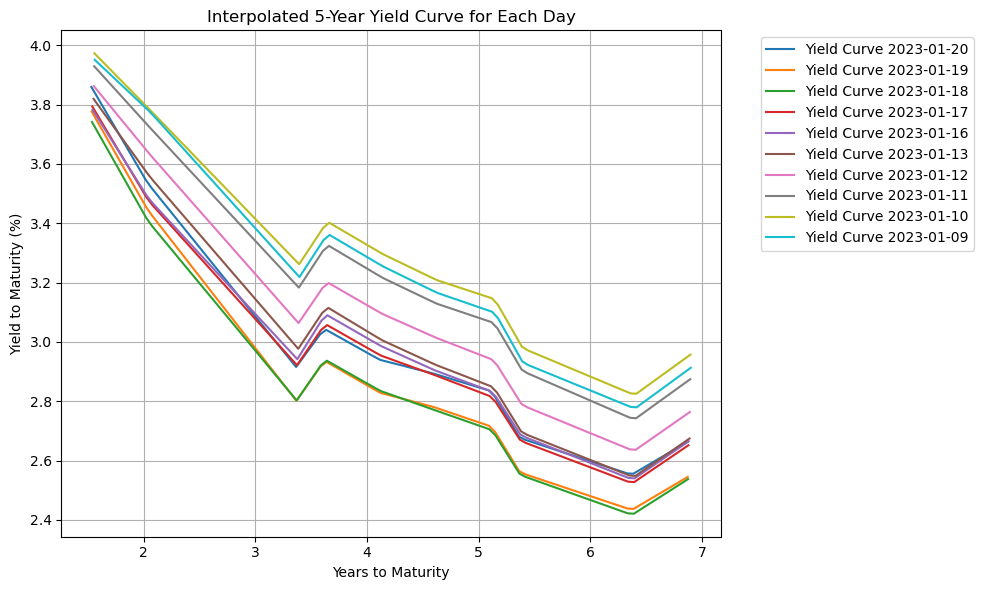

In [82]:
# Assuming a face value of 100 for all bonds
face_value = 100

# Unique dates in the dataset
unique_dates = bond_10['date'].unique()
collected_yield = []

# Plot setup
plt.figure(figsize=(10, 6))

# Iterate over each unique date
for date in unique_dates:
    # Filter bonds data for the current date
    bonds_data_date = bond_10[bond_10['date'] == date].to_dict(orient='records')
    
    ytms = []
    for bond in bonds_data_date:
        ytm = calculate_ytm(bond["close"] * face_value, face_value, bond["coupon"], bond["years_to_maturity"])
        ytms.append(ytm)
        # Store each bond's data in the list
        collected_yield.append({
            'date': date,
            'yield_rate': ytm,
            'years_to_maturity': bond["years_to_maturity"]
        })
    
        # Calculate YTM for each bond on this date
    ytms = [calculate_ytm(bond["close"] * face_value, face_value, bond["coupon"], bond["years_to_maturity"]) for bond in bonds_data_date]
    
    # Get years to maturity for sorting
    years_to_maturity = [bond["years_to_maturity"] for bond in bonds_data_date]
    
    
    # Sort YTMs and years to maturity for plotting
    sorted_indices = np.argsort(years_to_maturity)
    sorted_ytms = np.array(ytms)[sorted_indices]
    sorted_years_to_maturity = np.array(years_to_maturity)[sorted_indices]
    
    # Interpolating YTM for a smooth yield curve
    interpolated_ytm = interp1d(sorted_years_to_maturity, sorted_ytms, kind='linear', fill_value="extrapolate")
    
    # Generating points for the curve
    x_points = np.linspace(min(sorted_years_to_maturity), max(sorted_years_to_maturity), 100)
    y_points = interpolated_ytm(x_points)
    
    # Plotting the yield curve for the current date
    plt.plot(x_points, y_points * 100, label=f'Yield Curve {pd.to_datetime(date).date()}')

# Finalizing the plot
plt.title('Interpolated 5-Year Yield Curve for Each Day')
plt.xlabel('Years to Maturity')
plt.ylabel('Yield to Maturity (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position to avoid overlap
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


In [83]:
collected_yield = pd.DataFrame(collected_yield)
collected_yield

,date,yield_rate,years_to_maturity
0,2023-01-20,0.029155,3.364384
1,2023-01-20,0.030444,3.616438
2,2023-01-20,0.035352,2.035616
3,2023-01-20,0.038597,1.531507
4,2023-01-20,0.026761,5.367123
...,...,...,...
95,2023-01-09,0.032546,4.142466
96,2023-01-09,0.029130,6.898630
97,2023-01-09,0.030984,5.145205
98,2023-01-09,0.031659,4.624658


### 4.(b)

#### Pseudo-Code for Deriving the Spot Curve:
1. Preparation:Collect bond data, including prices, coupon rates, maturities, and payment frequencies.
2. For Each Bond: Calculate the cash flows, including coupon payments and the face value at maturity.
3. Bootstrapping the Spot Rates: 
* Start with the bond having the shortest maturity to find the 1-year spot rate. For a bond maturing in 1 year, the spot rate can be directly calculated since it will only have one cash flow (the face value plus the last coupon). Use the formula: spot rate = ((face value + coupon payment)/price)^(1/ytm)-1
* For bonds with maturities greater than 1 year, use the previously calculated spot rates to find the present value of cash flows occurring before the bond's maturity. Subtract these from the bond's price to isolate the final cash flow. Solve for the spot rate that equates this discounted cash flow to the isolated final cash flow.
* Repeat this bootstrapping process, moving from bonds with the shortest maturity to those with longer maturities, to derive spot rates for 2, 3, 4, and 5 years.
4. Constructing the Spot Curve: With spot rates for 1 through 5 years calculated, plot these rates against their corresponding maturities.
5. Plotting the Spot Curve

In [55]:
def bootstrap_yield_curve(bonds):
    spot_rates = np.zeros(len(bonds))

    for i, (price, coupon_rate, maturity) in enumerate(sorted(bonds, key=lambda x: x[2])):
        cash_flows = np.array([coupon_rate] * int(maturity - 1) + [100 + coupon_rate])
        time_periods = np.arange(1, maturity + 1)
        # Use previously calculated spot rates for discounted cash flows
        if i == 0:
            discounted_cash_flows = cash_flows / (1 + spot_rates[i])**time_periods
            discounted_cash_flows = np.sum(discounted_cash_flows)
        else:
            discounted_cash_flows = np.array([cf / (1 + spot_rates[j])**time_periods[j] for j, cf in enumerate(cash_flows)])
            discounted_cash_flows = np.sum(discounted_cash_flows)

        residual = price - discounted_cash_flows
        if residual <= 0:
            # Handle cases where residual is too low
            print(f"Warning: Residual for bond with maturity {maturity} is too low. Adjusting spot rate calculation.")
            spot_rate = spot_rates[i-1]  # Use previous spot rate as an approximation
        else:
            spot_rate = ((100 / residual)**(1 / maturity)) - 1
        spot_rates[i] = spot_rate

    return spot_rates


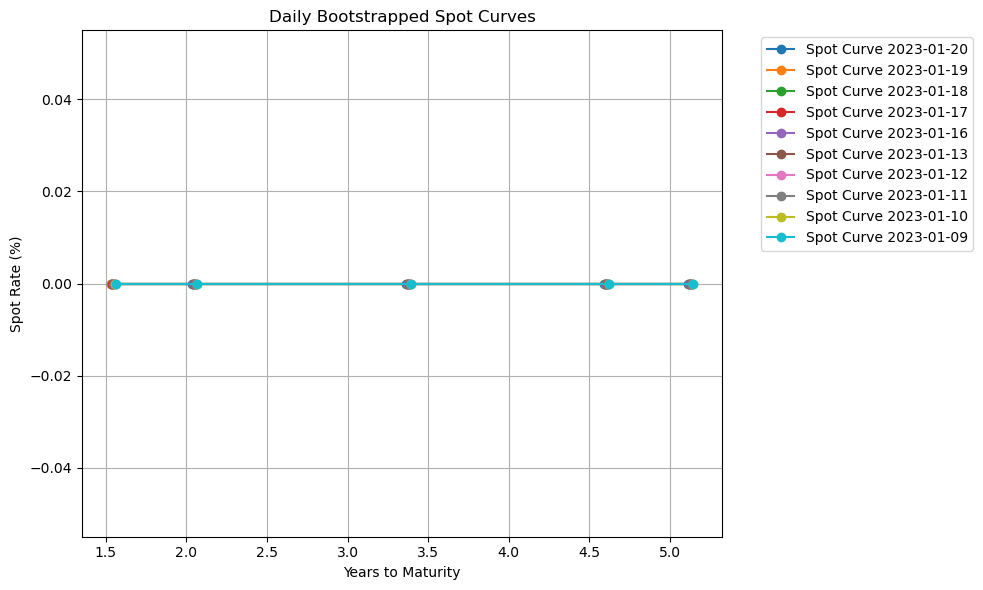

In [69]:
bond_5 = bond_10.loc[bond_10['isin'].isin(['CA135087N910','CA135087P659','CA135087E679','CA135087P733','CA135087P576'])]

collected_data = []

plt.figure(figsize=(10, 6))

for date in unique_dates:
    # Filter bond_5 for the current date
    bonds_date = bond_5[bond_5['date'] == date]
    
    # Extract bond data for bootstrap function
    bonds = [(row['close'] * 100, row['coupon'], row['years_to_maturity']) for index, row in bonds_date.iterrows()]
    
    # Calculate spot rates for this date's bonds
    spot_rates = bootstrap_yield_curve(bonds)
    
    for bond, spot_rate in zip(bonds, spot_rates):
        # bond is a tuple containing (close*100, coupon, years_to_maturity, isin)
        collected_data.append({
            'date': date,  
            'spot_rate': spot_rate,
            'years_to_maturity': bond[2]  # years_to_maturity is the third element in the tuple
        })
    
    # Ensure years to maturity are sorted along with corresponding spot rates
    years_to_maturity = sorted(bonds_date['years_to_maturity'].unique())
    sorted_spot_rates = [rate for _, rate in sorted(zip(bonds_date['years_to_maturity'], spot_rates))]
    
    # Plot
    plt.plot(years_to_maturity, sorted_spot_rates, '-o', label=f'Spot Curve {pd.to_datetime(date).date()}')

plt.title('Daily Bootstrapped Spot Curves')
plt.xlabel('Years to Maturity')
plt.ylabel('Spot Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.(c)

#### Pseudo-Code for Deriving the e 1-year Forward Curve:
1. Calculate or Obtain Spot Rates: Use a bootstrapping method to calculate the spot rates for each year.
2. Derive Forward Rates from Spot Rates: For each forward rate from year n to year n+1 (where n ranges from 2 to 5), apply the following formula to derive the forward rate based on the spot rates:
$$(1 + F_{n,n+1}) = \frac{(1+S_{n+1})^{n+1}}{(1+S_n)^n}$$
* $F_{n,n+1}$ is the forward rate from year n to year n+1 
* $S_n$ and $S_{n+1}$ are the spot rates for years n and years n+1 respectively
3. Calculate Forward Rates
* For each term from 2 to 5 years:Calculate the forward rate using the formula above.
* Store the calculated forward rate.
4. Store and Plot the Forward Curve
* Process: Collect all the calculated 1-year forward rates for terms 2 to 5 years.
* Plot: Use a plotting library (e.g., matplotlib) to plot the forward curve, with the x-axis representing the term (2 to 5 years) and the y-axis representing the forward rate.

In [72]:
# Convert collected data to DataFrame
spot_rate_dataset = pd.DataFrame(collected_data)

In [74]:
# Function to calculate forward rates from spot rates
def calculate_forward_rates(spot_rates):
    forward_rates = np.zeros(len(spot_rates) - 1)
    for i in range(1, len(spot_rates)):
        S_1 = spot_rates[0]
        S_1_plus_n = spot_rates[i]
        n = i
        # Apply the forward rate formula
        F_n_n_plus_1 = ((1 + S_1_plus_n)**(2*(n+1)) / ((1 + S_1)**2)**(1/(2*n))) - 1
        forward_rates[i-1] = F_n_n_plus_1
    return forward_rates

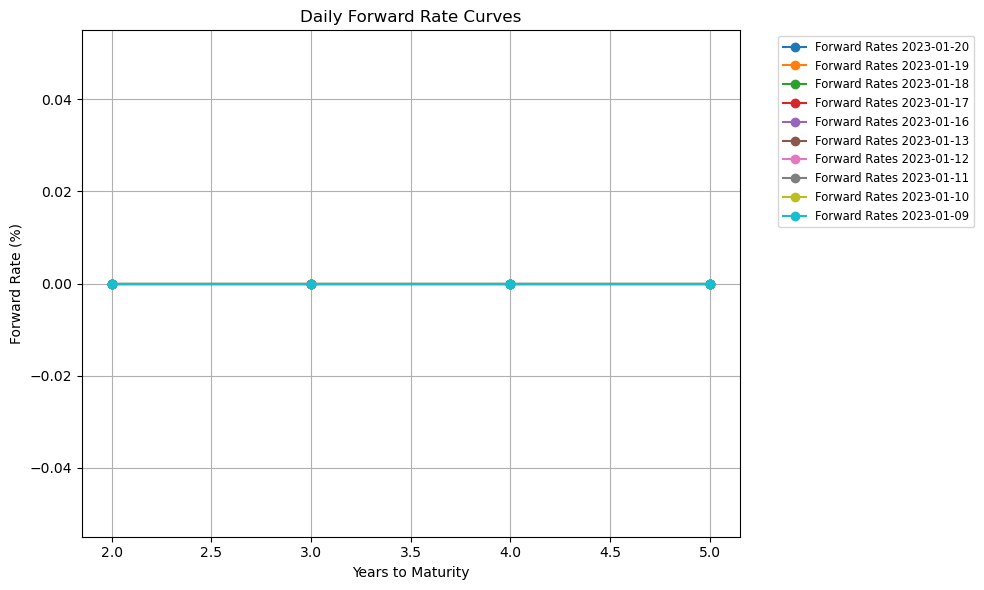

In [75]:
# Unique dates in the dataset
unique_dates = spot_rate_dataset['date'].unique()

# Initialize figure for plotting
plt.figure(figsize=(10, 6))

# Loop through each unique date to calculate and plot forward rates
for date in unique_dates:
    # Filter the dataset for the current date
    current_date_data = spot_rate_dataset[spot_rate_dataset['date'] == date]
    
    # Ensure the data is sorted by years to maturity
    current_date_data_sorted = current_date_data.sort_values(by='years_to_maturity')
    
    # Extract the spot rates for the current date
    spot_rates = current_date_data_sorted['spot_rate'].values
    
    # Calculate forward rates from the spot rates
    forward_rates = calculate_forward_rates(spot_rates)
    
    # Determine the years to maturity for plotting
    # Since forward rates start from the second year, adjust the years accordingly
    years = np.arange(2, len(forward_rates) + 2)  # Adjusted for forward rates
    
    # Plot the forward rates for the current date
    plt.plot(years, forward_rates * 100, '-o', label=f'Forward Rates {pd.to_datetime(date).date()}')

# Finalize the plot
plt.title('Daily Forward Rate Curves')
plt.xlabel('Years to Maturity')
plt.ylabel('Forward Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5 Yields rate cov

In [112]:
merged_yield = pd.merge(collected_yield, bond_10, on='years_to_maturity')
merged_yield = merged_yield.drop(columns=['date_y'])

# Rename 'date_x' to 'date'
merged_yield = merged_yield.rename(columns={'date_x': 'date'})
merged_yield['date'] = pd.to_datetime(merged_yield['date'])
# Filter bond_10 for desired ISINs and date
merged_yield = merged_yield.loc[(merged_yield['isin'].isin(['CA135087N910','CA135087P659','CA135087E679','CA135087P733','CA135087P576']))]

In [113]:
def calculate_log_returns(group):
    # Ensure the data is sorted by date
    group = group.sort_values(by='date')
    
    # Calculate log returns
    log_returns = np.log(group['yield_rate'].pct_change() + 1)
    
    # Replace infinite values with NaN and drop them
    log_returns = log_returns.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Extract the ISIN from the group (it's constant for each group)
    isin = group['isin'].iloc[0]
    
    # Return a DataFrame including the date, ISIN, and log returns
    return pd.DataFrame({
        'date': group['date'],
        'isin': isin,
        'log_return': log_returns
    })

# Apply the modified function
log_returns_by_bond_with_date = merged_yield_reset.groupby('isin', as_index=False).apply(calculate_log_returns).reset_index(drop=True)

/var/folders/3k/f2ynl7cs6s12709sxn16t2vc0000gn/T/ipykernel_31955/2937598326.py:22: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  log_returns_by_bond_with_date = merged_yield_reset.groupby('isin', as_index=False).apply(calculate_log_returns).reset_index(drop=True)


In [114]:
log_returns_by_bond_with_date.dropna(inplace = True)

In [115]:
# Now pivot the DataFrame so each column represents a bond's log returns and each row represents a date or sequence
log_returns_pivot = log_returns_by_bond_with_date.pivot(index='date', columns='isin', values='log_return')

# Calculate the covariance matrix
cov_matrix = log_returns_pivot.cov()

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
isin          CA135087E679  CA135087N910  CA135087P576  CA135087P659  \
isin                                                                   
CA135087E679      0.000686      0.000325      0.000733      0.000421   
CA135087N910      0.000325      0.000171      0.000347      0.000228   
CA135087P576      0.000733      0.000347      0.000792      0.000449   
CA135087P659      0.000421      0.000228      0.000449      0.000311   
CA135087P733      0.000694      0.000328      0.000748      0.000424   

isin          CA135087P733  
isin                        
CA135087E679      0.000694  
CA135087N910      0.000328  
CA135087P576      0.000748  
CA135087P659      0.000424  
CA135087P733      0.000708  


### 5 Forward rate cov

Actually it should follow the same method and logic with the yield rate covariance matrix that I generated above. However, the bond close price and coupon rate here I chose is quite inapporiate that the spot rate and forward rate that I have calculated is zero (but I believe my pseudo code and the actual code I wrote for these two rates are correct), therefore I did not list the results for forward rate covariance matrix here, it should have the same logic for yield rate cov matrix.

### 6

In [122]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors by the size of eigenvalues
idx = eigenvalues.argsort()[::-1]   
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:,idx]

eigenvectors_sorted

array([[ 0.51190106, -0.1686784 ,  0.8181937 , -0.15494769, -0.12670906],
       [ 0.24729999,  0.42413467, -0.160187  , -0.77984624,  0.35374069],
       [ 0.5499677 , -0.26238158, -0.51410055, -0.13008225, -0.58946643],
       [ 0.3226838 ,  0.80930552,  0.02339844,  0.45594003, -0.18019694],
       [ 0.51981796, -0.26045702, -0.20013078,  0.3781909 ,  0.69200487]])

In [123]:
eigenvalues_sorted

array([2.60080369e-03, 6.02725364e-05, 3.73185656e-06, 1.13122965e-06,
       8.72290926e-07])

The largest eigenvalue is approximately 0.0026 and its associated eigenvector is approximately $[0.512,0.247,0.550,0.323,0.520]$

The first (largest) eigenvalue represents the magnitude of the variance explained by its associated eigenvector's direction in the dataset. The associated eigenvector defines the direction in the multidimensional space that captures the most variance among the bonds. In portfolio theory, this could imply the direction of maximum variability in returns, suggesting a combination of assets that would lead to the most significant variance (risk) in the portfolio. 

# Reference

* All of my close price data are from https://www.boerse-frankfurt.de/ website
* a link to a GitHub repository with all my code: 